In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel(r"E:\AIML College\Assignment Three\Salary_dataset.xlsx")
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892


In [3]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [4]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 848.0 bytes


<Axes: >

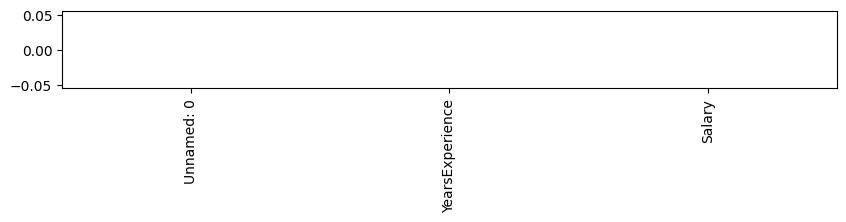

In [6]:
#Checking Null values
df.isnull().sum().plot(kind="bar", figsize=(10,1))

In [7]:
df["Salary"].value_counts()

Salary
39344     1
46206     1
122392    1
112636    1
116970    1
105583    1
109432    1
113813    1
101303    1
98274     1
91739     1
93941     1
81364     1
83089     1
66030     1
67939     1
61112     1
57082     1
56958     1
55795     1
63219     1
57190     1
64446     1
54446     1
60151     1
56643     1
39892     1
43526     1
37732     1
121873    1
Name: count, dtype: int64

In [8]:
df["Salary"].value_counts().sum()

30

<Figure size 1000x800 with 0 Axes>

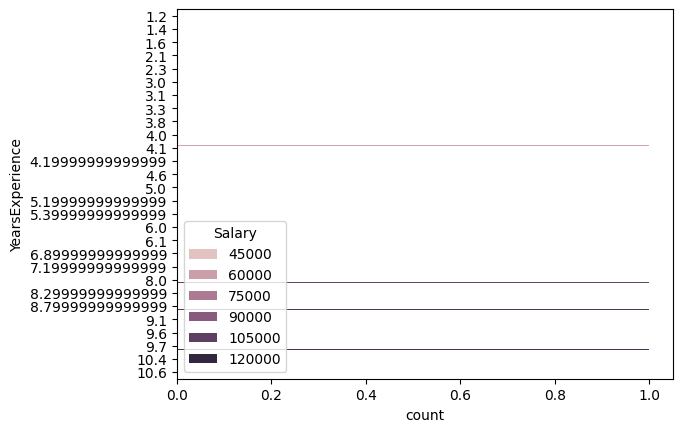

<Figure size 1000x800 with 0 Axes>

In [9]:
#For Year Vs Salary
sns.countplot(data=df, y="YearsExperience", hue="Salary")
plt.figure(figsize=(10,8))

In [10]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [11]:
df.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [12]:
df.head(10)

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


<Figure size 1600x800 with 0 Axes>

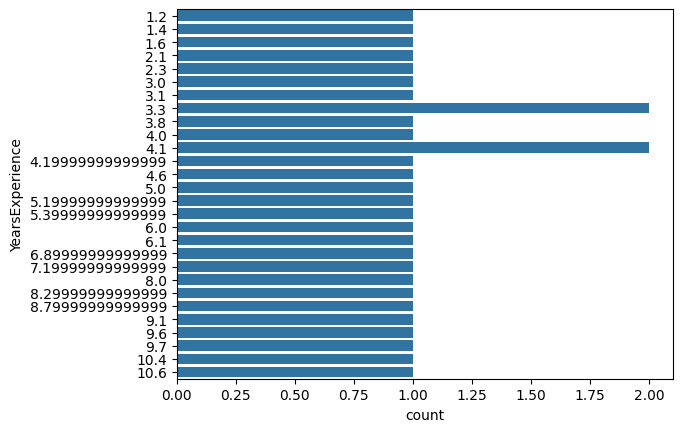

<Figure size 1600x800 with 0 Axes>

In [13]:
#Countplot for year experience
sns.countplot(data=df, y="YearsExperience")
plt.figure(figsize=(16,8))

In [14]:
state_sales = df.groupby("YearsExperience")["Salary"].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(state_sales, x="YearsExperience", y="Salary", title="Top 10 Year Experience vs Salary", color_discrete_sequence=px.colors.qualitative.Alphabet_r)
fig.show()

Text(0.5, 1.0, 'ScatterPlot of Salary vs Years of Experience')

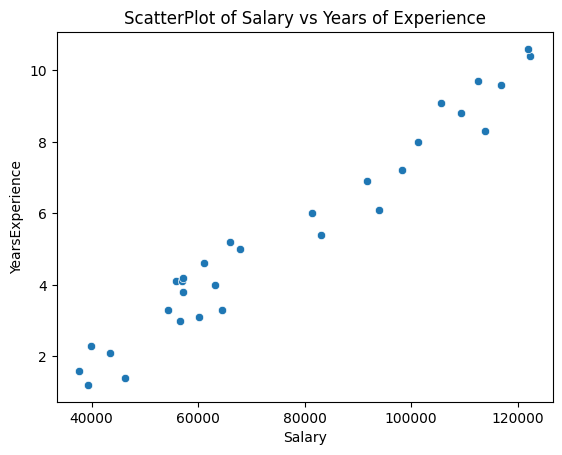

In [15]:
#Scatter Plot
sns.scatterplot(data=df, y="YearsExperience", x="Salary")
plt.title("ScatterPlot of Salary vs Years of Experience")

In [16]:
df["Salary"].value_counts()

Salary
39344     1
46206     1
122392    1
112636    1
116970    1
105583    1
109432    1
113813    1
101303    1
98274     1
91739     1
93941     1
81364     1
83089     1
66030     1
67939     1
61112     1
57082     1
56958     1
55795     1
63219     1
57190     1
64446     1
54446     1
60151     1
56643     1
39892     1
43526     1
37732     1
121873    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Salary Distribution')

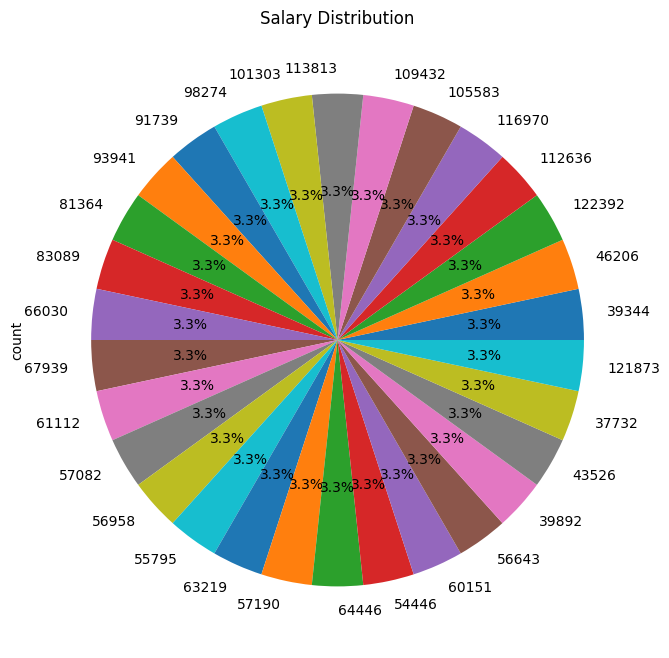

In [17]:
ax = df["Salary"].value_counts().plot(kind="pie", autopct="%.1f%%", figsize=(10, 8))
ax.set_title("Salary Distribution")

Text(0, 0.5, 'Frequency')

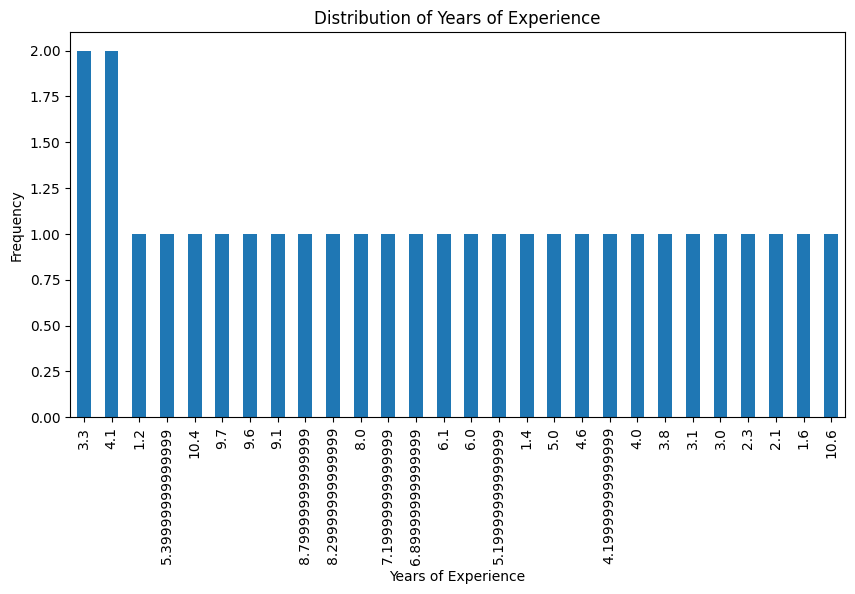

In [18]:
ax = df["YearsExperience"].value_counts().plot(kind="bar", figsize=(10, 5))
ax.set_title("Distribution of Years of Experience")
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Total Salary')

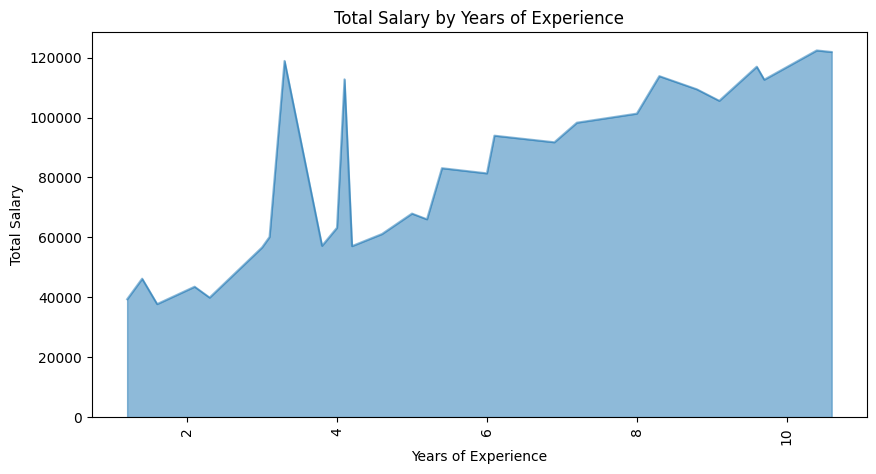

In [19]:
cdf =df.groupby("YearsExperience")["Salary"].sum()
ax = cdf.T.plot(kind="area", figsize=(10,5), rot=90, stacked=False)
ax.set_title("Total Salary by Years of Experience")
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Total Salary")

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = df[["YearsExperience"]]  
y = df["Salary"]             
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [22]:
x_train

,YearsExperience
2,1.6
8,3.3
4,2.3
11,4.1
7,3.3
15,5.0
27,9.7
5,3.0
17,5.4
3,2.1


# Using Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(x_test)

In [25]:
y_pred

array([ 64723.05451189,  63794.45836056,  82366.38138722, 100009.70826255,
        81437.78523589, 114867.24668387])

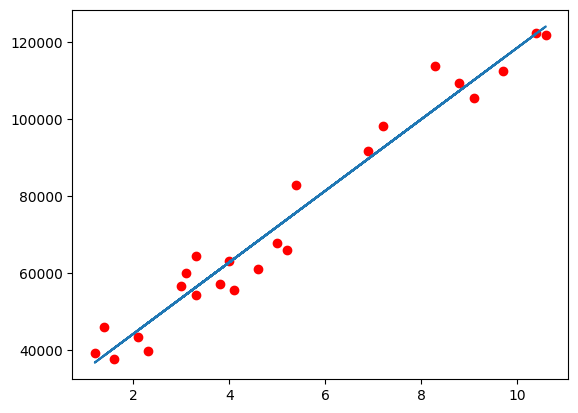

In [26]:
plt.scatter(x_train, y_train, color= "red")
plt.plot(x_train, regressor.predict(x_train))
plt.show()

In [27]:
from sklearn import metrics
y_pred = regressor.predict(x_test)

#Calculationg Metrices
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Rote mean squared error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4920.326962449878
Mean Squared Error: 40865715.381398045
Rote mean squared error: 6392.629770399506
